# Learning from Data: Workshop 2

| Date set     | Hand-in date |
|------------------|-----------------------------------|
|23rd January 2018  | **12:00 Friday 16th February 2018** |


This workshop is worth 10% of the total module mark.



Candidate number: 074556

# Your report should consist of your Jupyter notebook showing what you did, what was the
result, and what you can conclude from the exercise. Each report will be
assessed on the following criteria:

* Does it record what was done in the exercise?
* Does it permit the results to be reproduced?
* How does the work relate to the theoretical foundations discussed in lectures?
* Is it well presented?

Use markdown to explain what you are doing, what the results mean, how they relate to the theory, etc. 

You can add new cells as you think fit and delete ones that are not needed (for example, this and the next one). 

### Submitting the notebooks

Only an electronic submissions is required.  Submit your notebook (the .ipynb file) to electronic copy via the  [electronic hand-in system](http://empslocal.ex.ac.uk/submit/) using the topic <cmd>2018-02-16~ECM3420~Richard Everson~Workshop 2 Classification and cross validation</cmd>.

You should be able to upload the notebook directly from wherever it is on your machine.  If you're not sure where it is, type <code>pwd</code> (print working directory) in a cell to find out.  To keep the marking anonymous, please don't leave directory names that reveal your identity in cells.

<div class="alert alert-warning">
Although you will undoubtedly work collaboratively in the workshops themselves, these are *individual* exercises.  The reports you write should be about the results *you* obtained, and your attention is drawn to the College and University guidelines on collaboration and plagiarism. 

In [1]:
%pylab inline
figsize(8,8)


Populating the interactive namespace from numpy and matplotlib


## Classification with k-nearest neighbours

In this section of the workshop you will use a k-nearest neighbours classifier to first classify some two-dimensional data that can be easily plotted.  After that we'll try it on a more complicated dataset.

First download and plot some data

In [2]:
import wget

try: 
    X = loadtxt('raw-tremor.txt')
except IOError:
    wget.download('http://empslocal.ex.ac.uk/~reverson/ECM3420/raw-tremor.txt')
    X = loadtxt('raw-tremor.txt')
print(X.shape)

(357, 3)


The first two columns of X are the features and the third column is the corresponding target, so split them into separate arrays for each.

In [3]:
t = X[:,2]  #Create an array consisting of all the target values (3rd index in X) for each feature pair.
X = X[:,:2] #Overwrite X to truncate/remove the target value for each feature pair/nested array. (3rd index)

#Note: order is preserved in assigment and reassignment

print(t.shape, X.shape)

(357,) (357, 2)


Plot the data according to the labels

Text(0.5,1,'A scatterplot comparing Patients and Normal people')

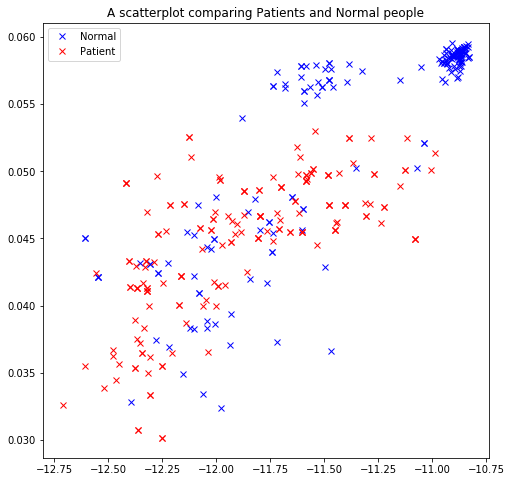

In [4]:
normal = t == 1
patient = t == 0
plot(X[normal,0], X[normal,1], 'bo', marker="x", label='Normal')
plot(X[patient,0], X[patient,1], 'rs',marker="x", label='Patient')
legend(loc=2)
title("A scatterplot comparing Patients and Normal people")

#Note: changed markers from dots to x's because of personal preference.

Note the disparity in the scales of the two features.

Text(0.5,1,'A scatterplot coloured according to the value of t')

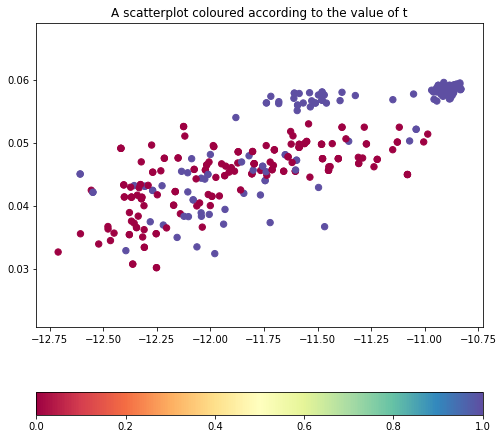

In [5]:
# An alternative way of plotting that colours the markers according to the value of t
scatter(X[:,0], X[:,1], s=40, c=t, cmap=cm.Spectral)
colorbar(orientation='horizontal')
title("A scatterplot coloured according to the value of t")

### Mean and standard deviation

Find the mean (centroid) and standard deviation of the features as a whole and also for each of the classes. Check that the mean and standard
  deviation make sense in terms of your scatter plot.  You could plot the location of the centroid on the scatter plot.

feature mean X: -11.6221685307
feature mean Y: 0.0489298390909
feature std X: 0.545104841969
feature std Y: 0.0077712764187

patient mean X: -11.8962358138
patient mean Y: 0.0446536361393
patient std X: 0.407388595785
patient std Y: 0.00516589314542

normal mean X: -11.3465615438
normal mean Y: 0.0532300656546
normal std X: 0.526835810944
normal std Y: 0.00757679308752


Text(0.5,1,'A scatterplot coloured according to the value of t.\n (While showing the centroids of Patients, Normal, and both as a Whole)')

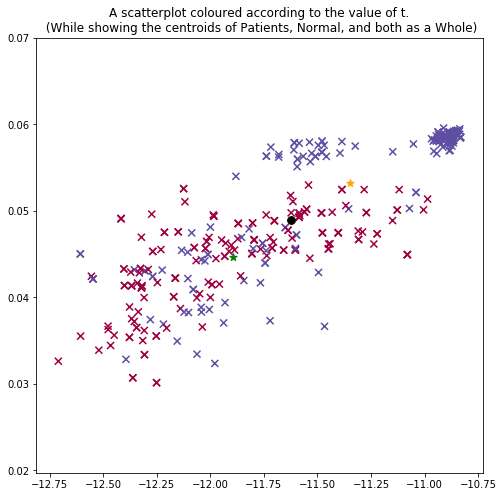

In [6]:
#----Mean and Standard Deviation of Features as a whole----#
feature_mean_x = sum(X[:,0]) / len(X)
feature_mean_y = sum(X[:,1]) / len(X)

feature_std_x  = std(X[:,0]) 
feature_std_y  = std(X[:,1])

feature_centroid = [feature_mean_x, feature_mean_y]

#Debug printing
print("feature mean X: " + str(feature_mean_x))
print("feature mean Y: " + str(feature_mean_y))
print("feature std X: " + str(feature_std_x))
print("feature std Y: " + str(feature_std_y))

#----Mean and Standard Deviation of each class/target----#
#Patient; t = 0
num_patients = len(X[patient,0])

patient_mean_x = sum(X[patient,0]) / num_patients
patient_mean_y = sum(X[patient,1]) / num_patients

patient_std_x  = std(X[patient,0])
patient_std_y  = std(X[patient,1])

patient_centroid = [patient_mean_x, patient_mean_y]

#Debug printing
print("\npatient mean X: " + str(patient_mean_x))
print("patient mean Y: " + str(patient_mean_y))
print("patient std X: " + str(patient_std_x))
print("patient std Y: " + str(patient_std_y))

#Normal; t = 1
num_normal = len(X[normal,0])

normal_mean_x = sum(X[normal,0]) / num_normal
normal_mean_y = sum(X[normal,1]) / num_normal

normal_std_x  = std(X[normal,0])
normal_std_y  = std(X[normal,1])

normal_centroid = [normal_mean_x, normal_mean_y]

#Debug printing
print("\nnormal mean X: " + str(normal_mean_x))
print("normal mean Y: " + str(normal_mean_y))
print("normal std X: " + str(normal_std_x))
print("normal std Y: " + str(normal_std_y))

#---Visualisation of results---#
scatter(X[:,0], X[:,1], s=50, marker="x", c=t, cmap=cm.Spectral)

#Draw Feature Centroid (BLACK CIRCLE)
scatter(feature_centroid[0], feature_centroid[1], marker="o", c="black", s=60)

#Draw Patient Centroid (GREEN STAR)
scatter(patient_centroid[0], patient_centroid[1], marker="*", c="green", s=60)

#Draw Normal Centroid (ORANGE STAR)
scatter(normal_centroid[0], normal_centroid[1], marker="*", c="orange", s=60)

title("A scatterplot coloured according to the value of t.\n (While showing the centroids of Patients, Normal, and both as a Whole)")

Make sure you understand the way the above works.  Print the values of the variables is you're not sure and use help etc to find out about plot and scatter.

# Covariance 

Use the Python command <code>cov</code> to return the covariance matrix (remember that the covariance matrix should be a 2 by 2 matrix for these data).  Check that the diagonal entries are what you expect from the standard deviations.

In [7]:
cov_matrix = cov(X[:,0], X[:,1])
print(cov_matrix)

[[  2.97973950e-01   3.57549241e-03]
 [  3.57549241e-03   6.05623797e-05]]


# Write nested loops to calculate the covariance matrix by hand:
\begin{align*}
   S_{ij} = \frac{1}{N-1}\sum_{n=1}^N (x_{ni} - \bar{x}_{i})(x_{nj} - \bar{x}_{j})
\end{align*}
for each $i$ and $j$.

Check that you get the same result using both methods.  The <code>cov</code> function will divide by either $N$ or $N-1$ (read the help/docstring for <code>cov</code>) make sure the differences you obtain are not due to this.  The function <code>allclose</code> is useful for checking the result.

In [8]:
xbar = feature_mean_x
ybar = feature_mean_y

#Create a placeholder matrix
covA = [[0,0],[0,0]]

#Populate the data cell by cell.
for n in range(2):
    for m in range(2):
        if n == 0 and m == 0:
            covA[n][m] = sum( (X[:,0] - xbar)*((X[:,0] - xbar)) )/len(X[:,0])

        if n == 0 and m == 1:
            covA[n][m] = sum( (X[:,0] - xbar)*((X[:,1] - ybar)) )/len(X[:,0])

        if n == 1 and m == 0:
            covA[n][m] = sum( (X[:,1] - ybar)*((X[:,0] - xbar)) )/len(X[:,0])

        if n == 1 and m == 1:
            covA[n][m] = sum( (X[:,1] - ybar)*((X[:,1] - ybar)) )/len(X[:,0])

print(covA[0],"\n",covA[1])

[0.29713928873756834, 0.0035654770230299101] 
 [0.0035654770230299101, 6.039273717578942e-05]


Find the
correlation between the two variables $x_1$ and $x_2$ from the standardised
covariance matrix.  You can use  <code>corrcoef</code> to check your results, but you should be able to read it from the covariance matrix of the standardised data (why?).

In [9]:
x_1 = sqrt(covA[0][0])
x_2 = sqrt(covA[1][1])

x_correlation = covA[0][1]/(x_1*x_2)
print(x_correlation)

0.841676585139


## k-nearest neighbour classifier

Now we will use a k-nn classifier to classify the data.  You will have to divide the data into a training and a test set as shown below.  

In [10]:
# Divide the data into training and test sets by shuffling into a random order
# and choosing the first half as trainng data and reserving the second half for testing.

from numpy.random import permutation
N = X.shape[0]
I = permutation(N)   # Shuffled indices 0,..., N-1
Itr = I[:N//2]
Ite = I[N//2:]

Xtr = X[Itr,:]
ttr = t[Itr]

Xte = X[Ite,:]
tte = t[Ite]

# Make a copy of the features as you will need it later.
Xtr_copy = Xtr.copy()
Xte_copy = Xte.copy()


Plot your training and test sets to make sure that they look like a fair random division of the data.

The training data are to be used to construct the classifier. The test data, which should not be used at all during training, are used to evaluate how well the classifier works.

Text(0.5,1,'A plot of the data partitioned into the training and testing sets')

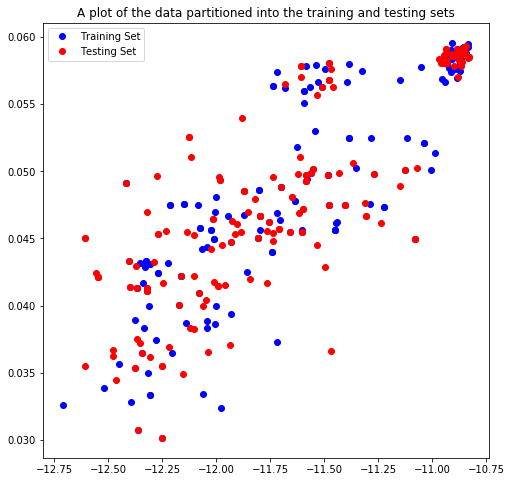

In [11]:
plot(Xtr[:,0], Xtr[:,1], 'bo' , label="Training Set") #Plot Traning Set
plot(Xte[:,0], Xte[:,1], 'ro', label="Testing Set")   #Plot Testing Set
legend(loc=2)
title("A plot of the data partitioned into the training and testing sets")

### Standardisation

Since the scales of the data are so different, it will be important to standardise the data before trying to classify it.


Find the mean and standard deviations of the *training* data and use these to standardise the training data.  (You can use the commands
<code>mean</code> and <code>std</code> to find the mean and standard deviation.) Use the training data mean and standard deviation to standardise the test data.  Note that it's important to use the training data statistics (rather than the test data statistics) because both data should be treated in *exactly* the same way and we might only have a single test data point to classify.

 
Plot the standardised data 
and check your result by finding its mean and covariance matrix. 


Training set covariance matrix: 
 [[ 1.00564972  0.85513249]
 [ 0.85513249  1.00564972]] 

Test set covariance matrix: 
 [[ 1.03720066  0.81765672]
 [ 0.81765672  0.93173163]] 

Standardised data mean:  -0.0865611198078 ,  -0.0691608357377 



Text(0.5,1,'A scatterplot of the standardised testing and training sets\n(Training=red, Testing=blue)')

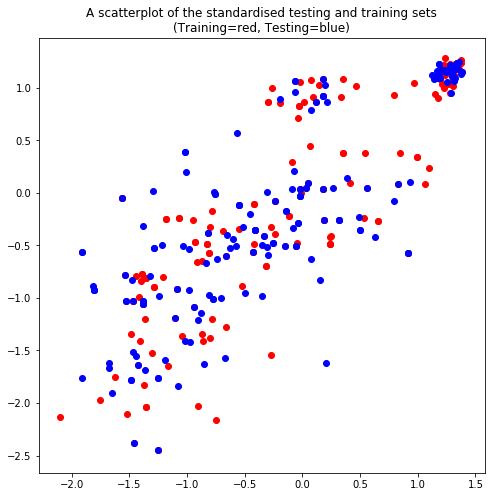

In [12]:
#Calculate the mean and standard deviation of feature X from Xtr
Xtr_x_mean = numpy.mean(Xtr[:,0])
Xtr_x_std = std(Xtr[:,0])

#Calculate the mean and standard deviation of feature Y from Xtr
Xtr_y_mean = numpy.mean(Xtr[:,1])
Xtr_y_std = std(Xtr[:,1])

#Standardise Xtr
Xtr[:,0] = (Xtr[:,0] - Xtr_x_mean)/Xtr_x_std
Xtr[:,1] = (Xtr[:,1] - Xtr_y_mean)/Xtr_y_std

#Standardise Xte according to the mean and standard deviation of Xtr
Xte[:,0] = (Xte[:,0] - Xtr_x_mean)/Xtr_x_std
Xte[:,1] = (Xte[:,1] - Xtr_y_mean)/Xtr_y_std

#Get Xtr_standardised's covariance matrix
Xtr_cov = cov(Xtr[:,0], Xtr[:,1])
print("Training set covariance matrix: \n" , Xtr_cov, "\n")

#Get Xte's covariance according to Xtr
Xte_cov = cov(Xte[:,0], Xte[:,1])
print("Test set covariance matrix: \n" , Xte_cov, "\n")

#Print the standardised data's mean
X_standardised_mean_x = ( mean(Xtr[:,0]) + mean(Xte[:,0]) ) / 2
X_standardised_mean_y = ( mean(Xtr[:,1]) + mean(Xte[:,1]) ) / 2
print("Standardised data mean: " , X_standardised_mean_x , ", " , X_standardised_mean_y, "\n")

#Plot standardised data
scatter(Xtr[:,0], Xtr[:,1], c="r")
scatter(Xte[:,0], Xte[:,1], c="b")
title("A scatterplot of the standardised testing and training sets\n(Training=red, Testing=blue)")


We will use the k-nearest neighbour classifier from scikit learn, which is  quite an extensive implementation of various machine learning algorithms.

In [13]:
from sklearn import neighbors

In general you can train the clasifier using <code>Xtr</code> and <Ttr> and then make a prediction of the classes of the features in <code>Xte</code> as follows:
<pre>
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtr, ttr)   # Train it

y = knn.predict(Xte)  # Predict the class of the testing data
</pre>

The next cell shows you how to classify points on a grid in feature space.  This is so that we can gain an understanding of how the classifier works for a whole range of points.  Note that this will give poor results unless you have first standardised your data.

(-3.0, 3.0, -3.0, 3.0)

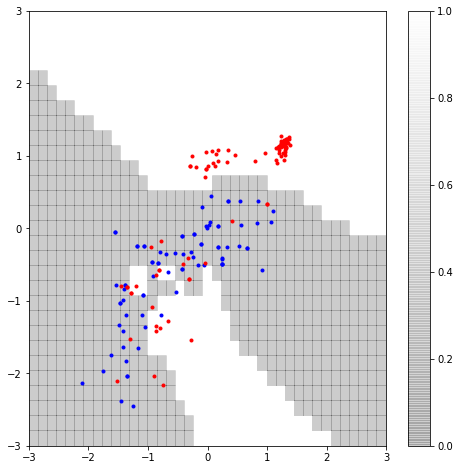

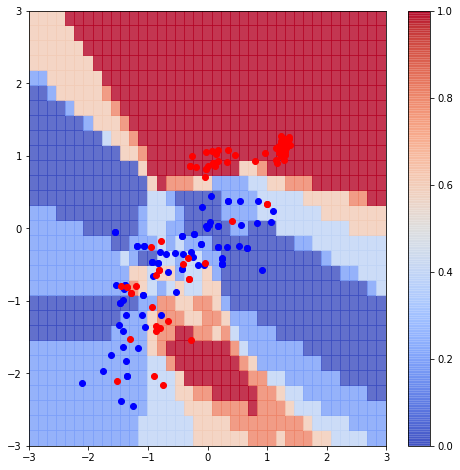

In [14]:
k = 5   # Choose the number of nearest neighbours

knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(Xtr, ttr)

# Plot the prediction by the classifier of the class probability 
# (estimated from the fraction of points of each class in the k
# nearest neighbours) for data on a grid.  

N, M = 40, 30   # Make these larger to get a smoother picture

Xgrid = linspace(-3.0, 3.0, N)
Ygrid = linspace(-3.0, 3.0, M)
pred = zeros((M,N))
prob = zeros((M,N,2))
# Writing this double loop to classifiy one point at a time is 
# not very efficient, but it is clear.
for ny, y in enumerate(Ygrid):
    for nx, x in enumerate(Xgrid):
        pred[ny, nx] = knn.predict([[x, y]])          # Predict expects a matrix of features
        prob[ny, nx, :] = knn.predict_proba([[x, y]]) # Probabilities of belonging to one class
pcolor(Xgrid, Ygrid, pred, cmap=cm.gray, alpha=0.2)
colorbar()
plot(Xtr[ttr==0,0], Xtr[ttr==0,1], 'b.')
plot(Xtr[ttr==1,0], Xtr[ttr==1,1], 'r.')
axis('tight')

# Plot the class probabilites
figure()
pcolor(Xgrid, Ygrid, prob[:,:,1], cmap=cm.coolwarm, alpha=0.8)
colorbar()
plot(Xtr[ttr==0,0], Xtr[ttr==0,1], 'bo')
plot(Xtr[ttr==1,0], Xtr[ttr==1,1], 'ro')
axis('tight')


In addition to classifying points on a grid to draw pictures, we can train the classifier on the training data and then classify each of the features in the test data (pretending that we don't know the true corresponding targets). 

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtr, ttr)   # Train it

y = knn.predict(Xte)  # Predict the class of the testing data

Use your classifier to carry out $k=1$ classification of the
<code>Xte</code> tremor data. Following the example above,  plot the
training data according to its class and plot the test data according to
both its true class (from <code>tte</code>) and its predicted class from your
classifier.  Where the predicted class differs from the true class make
sure that you can see from the plot why the classifier has classified the
way it has. Work out the <i>classification accuracy</i> for your
classifier, that is the fraction of examples in <code>Xte</code> for which  the
classifier predicts the correct class.

Repeat the above for  $k = 3$ and $k = 10$ and give an explanation for
your results.   Automate the procedure to plot a graph of the
classification accuracy of <code>Xte</code> versus $k$ for $k$ up to about 40.  What's the best $k$ to use?  Why are smaller $k$ worse?  Why are larger $k$ worse?

Now plot the classification accuracy for the <i>training </i> data (that
is call your classifier like <code>knn.predict(Xtr)</code>).
Explain the shape of the curve.

Text(0.5,1,'k=10, Class/Grid probability using testing set')

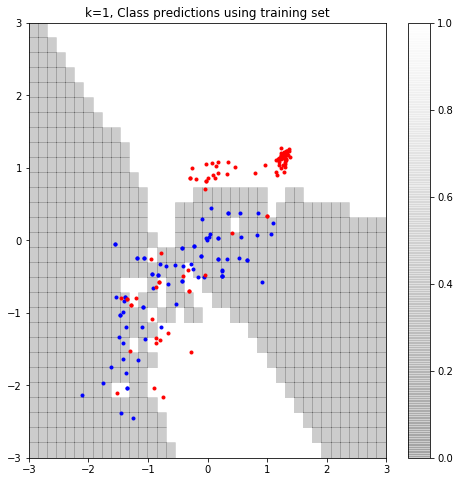

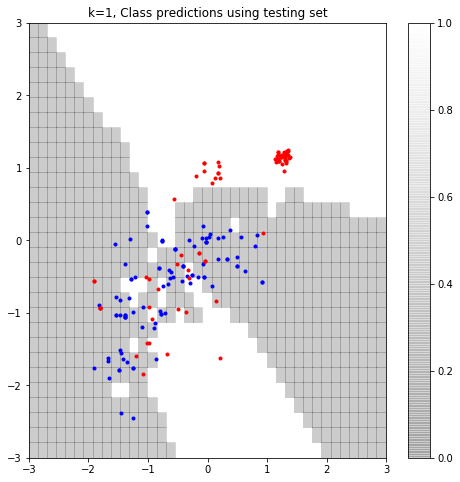

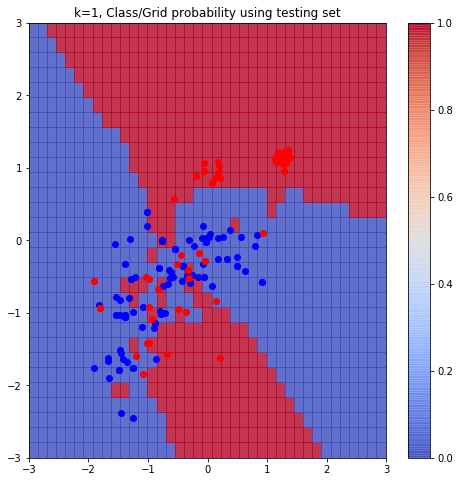

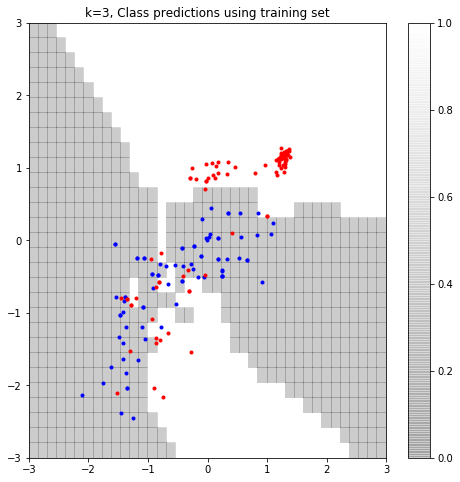

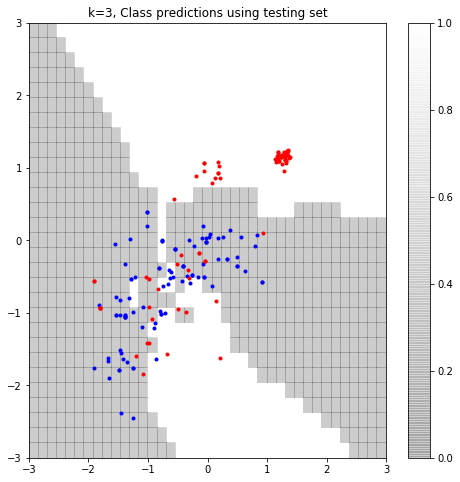

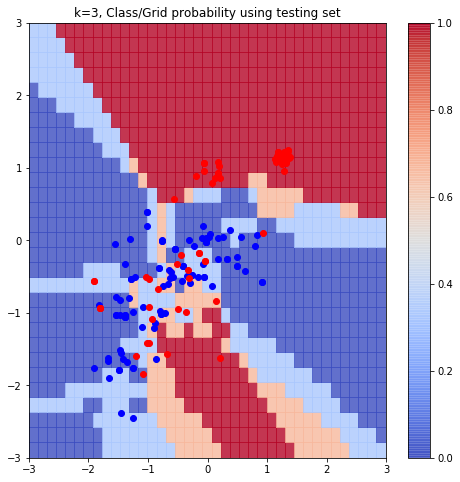

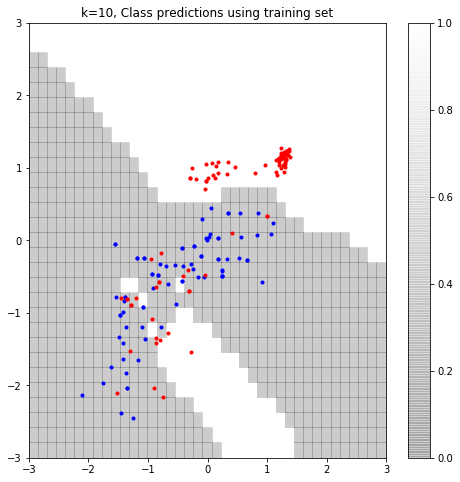

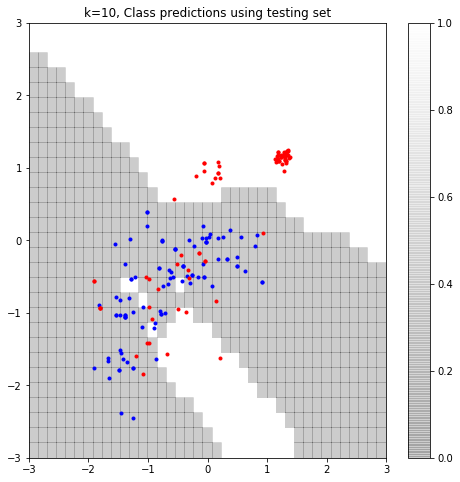

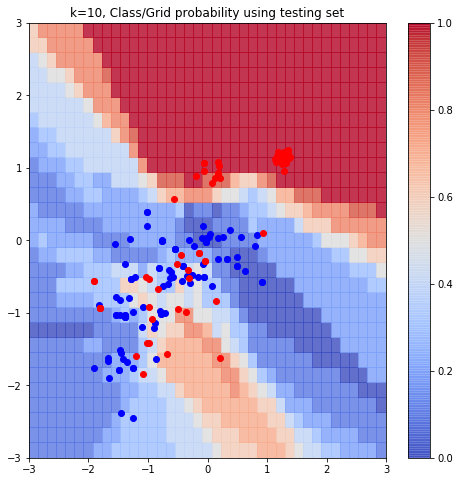

In [16]:
#NOTE: HERE I USE STANDARDISED DATA, LATER WHEN IT ASKS HOW IT COMPARIES WITH STANDARDISED DATA:
#        I INSTEAD COMPARE TO UNSTANDARDISED DATA. The question isnt explicitly clear as to which 
#        data should be used until after.

def getPredictedClass(k, data, data_target, testBool, graphBool, accuracyBool):
    #k is the number of neighbors
    #data is the dataset e.g. Xtr, Xte
    #data_target is the dataset's class e.g. tte, ttr
    #testBool is a boolean specifying whether we are using the testing set or not 
    # (if we have to train the classifier using the training set before testing it)
    
    #graphBool is a boolean specifying whether or not a graph should be drawn
    
    #accuracyBool is a boolean specifying whether or not to calculate and return the accuracy. 
    # This is independent of testBool because it allows for widened testing purposes and 
    # allows us to return the accuracy if true which makes accumulating the accuracy data easier.
    
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    
    #If we are utilizing the test set, we normally train the classifier 
    # with the training data before using the test to evaluate its effectiveness.
    if(testBool):
        knn.fit(Xtr, ttr)
    else:
        knn.fit(data, data_target)

    N, M = 40, 30 
    Xgrid = linspace(-3.0, 3.0, N)
    Ygrid = linspace(-3.0, 3.0, M)
    
    pred = zeros((M,N))
    
    for ny, y in enumerate(Ygrid):
        for nx, x in enumerate(Xgrid):
            pred[ny, nx] = knn.predict([[x, y]])          # Predict expects a matrix of features
            
            
    #If graphbool is true, draw the knn.predict graph (class predictions for each datapoint)
    if(graphBool):
        figure()
        pcolor(Xgrid, Ygrid, pred, cmap=cm.gray, alpha=0.2)
        colorbar()
        plot(data[data_target==0,0], data[data_target==0,1], 'b.')
        plot(data[data_target==1,0], data[data_target==1,1], 'r.')
        axis('tight')

    
    #If true, calculate and return the accuracy.    
    if(accuracyBool):
        predicted = knn.predict(data)
        n_correct = 0
        
        for d in range(len(data_target)):
                if(data_target[d] == predicted[d]):
                    n_correct += 1
                    
        accuracy = n_correct/len(data_target)
        #print(accuracy*100,"%, k=",k)
        return accuracy

    
def getClassProbability(k, data, data_target, testBool, graphBool):
    #k is the number of neighbours
    #Data is the dataset
    #testBool is a boolean specifying whether we are using the testing set or not 
    # (if we have to train the classifier using the training set before testing it)
    
    #graphBool is a boolean specifying whether or not a graph should be drawn
    
    
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    if(testBool):
        knn.fit(Xtr, ttr)
    else:
        knn.fit(data, data_target)

    N, M = 40, 30
    Xgrid = linspace(-3.0, 3.0, N)
    Ygrid = linspace(-3.0, 3.0, M)
    
    prob = zeros((M,N,2))
    
    for ny, y in enumerate(Ygrid):
        for nx, x in enumerate(Xgrid):
            prob[ny, nx, :] = knn.predict_proba([[x, y]]) # Probabilities of belonging to one class        

    #If graphBool is true, plot the class probabilites
    if(graphBool):
        figure()
        pcolor(Xgrid, Ygrid, prob[:,:,1], cmap=cm.coolwarm, alpha=0.8)
        colorbar()
        plot(data[data_target==0,0], data[data_target==0,1], 'bo')
        plot(data[data_target==1,0], data[data_target==1,1], 'ro')
        axis('tight')

getPredictedClass(1, Xtr, ttr, False, True, False) #False because prediciton will be 100% accurate (testing with training data)
title("k=1, Class predictions using training set")
getPredictedClass(1, Xte, tte, True, True, True)
title("k=1, Class predictions using testing set")
getClassProbability(1, Xte, tte, True, True)
title("k=1, Class/Grid probability using testing set")

getPredictedClass(3, Xtr, ttr, False, True, True)
title("k=3, Class predictions using training set")
getPredictedClass(3, Xte, tte, True, True, True)
title("k=3, Class predictions using testing set")
getClassProbability(3, Xte, tte, True, True)
title("k=3, Class/Grid probability using testing set")


getPredictedClass(10, Xtr, ttr, False, True, True)
title("k=10, Class predictions using training set")
getPredictedClass(10, Xte, tte, True, True, True)
title("k=10, Class predictions using testing set")
getClassProbability(10, Xte, tte, True, True)
title("k=10, Class/Grid probability using testing set")

#NOTE, IT IS MUCH EASIER TO ANALYSE THE GRAPH IN SETS OF 3 (AS SEEN ABOVE WHERE k=1,3,10)


#### Results Explanation for k=1,3,10
<br>
The maximum and mimumum occur both when k=3. 

The reason there is this spread is because of how largely there are two distinct clusters of data.
Additonally, the reason there is such a consistent level of error is because of the similar values
that some members of the normal class have in common in comparison to the patient class.

k=1 presents too rigid of a model and suffers from overfitting

k=3 neither overfits the data nor provides consistent classification, however, 
its lower tolerance in comparison to k=1 can allow it to have both better and worse results

k=10 provides too little tolerance to correctly classify data, thus leaving it largely up to chance depending
on the data


The highest accuracy is:  87.15083798882681 %, where the value of K is:  4


Text(0.5,1,'Accuracy for each value of K (standardised testing data)')

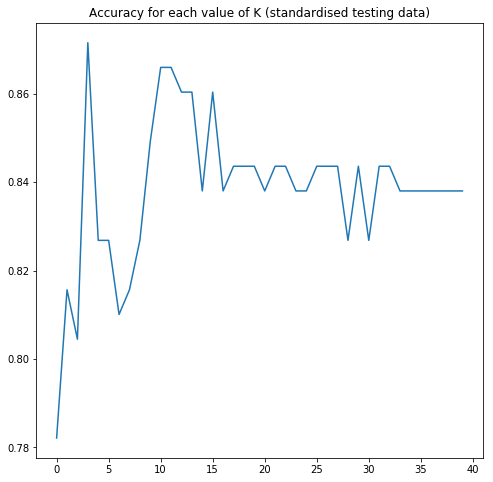

In [17]:
#---Automate up to k=40 ----#
accuracy_data = []
for n in range(40):
    #For k in the range 1-40, get the accuracy of the classifier for each value of k.
    accuracy_data.append(getPredictedClass(n+1, Xte, tte, True, False, True) )
    
print("The highest accuracy is: ",max(accuracy_data)*100, "%, where the value of K is: ", accuracy_data.index(max(accuracy_data))+1 )

plot(accuracy_data[:])
title("Accuracy for each value of K (standardised testing data)")


#### Results Explanation

What is the best value of k? : 2, it has the highest accuracy with 88.82%. It is also the most consistent across several tests. (Usually the lower the better - usually)

Why are smaller k worse? : they overfit the model for the classifier

Why are larger k worse?  : they underfit the model for the classifier

The highest accuracy is:  100.0 %, where the value of K is:  1


Text(0.5,1,'Accuracy for each value of K (standardised training data)')

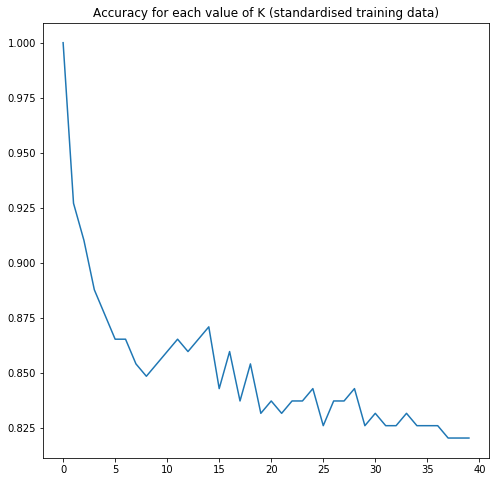

In [18]:
#---Classification accuracy for training data----#

accuracy_data_xtr = []
for n in range(40):
    #For k in the range 1-40, get the accuracy of the classifier for each value of k.
    accuracy_data_xtr.append(getPredictedClass(n+1, Xtr, ttr, True, False, True) )
    
print("The highest accuracy is: ",max(accuracy_data_xtr)*100, "%, where the value of K is: ", accuracy_data_xtr.index(max(accuracy_data_xtr))+1 )

plot(accuracy_data_xtr[:])
title("Accuracy for each value of K (standardised training data)")


#### Results Explanation

As k increases, it introduces uncertainty where there should be none. k=1 has 100% accuracy because it is the same data used to train the classifier. 

By increasing k, we are increasing the probability it could be some other value than the expected.

Now use the k-nn classifier to find the accuracy using the standardised data.  How does it compare with the raw data?

The highest accuracy is:  0.5307262569832403 , where the value of K is:  4


Text(0.5,1,'Accuracy for each value of K (unstandardised testing data)')

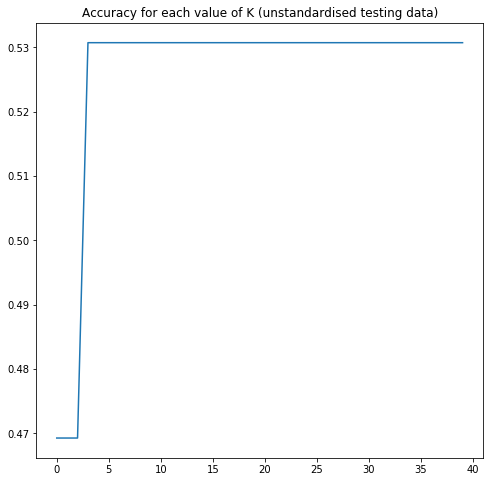

In [19]:
#NOTE: BEFORE I USED STANDARDISED DATA, NOW I INSTEAD COMPARE IT TO UNSTANDARDISED DATA. 
# (The question isnt explicitly clear as to which data should be used until after.)

getPredictedClass(1, Xte_copy, tte, True, False, True )

#---Automate up to k=40 ----#
accuracy_data = []
for n in range(40):
    #For k in the range 1-40, get the accuracy of the classifier for each value of k.
    accuracy_data.append(getPredictedClass(n+1, Xte_copy, tte, True, False, True) )
    
print("The highest accuracy is: ",max(accuracy_data), ", where the value of K is: ", accuracy_data.index(max(accuracy_data))+1 )

plot(accuracy_data[:])
title("Accuracy for each value of K (unstandardised testing data)")



#### Results Explanation

By using unstandardised data we are not placing all the data in an equal feature space and removing correlations. This means it is significantly more difficult to classify the data. Generally, the unstandardised data always underperforms with a few anomlies appearing occasionally.

Usually, it is around 50% because in order for the training and test data to be truly randomly split there should be a 50% chance between selecting a patient and someone normal randomly. This means it has a ~50/50 chance of selecting a patient or other.

### Cross validation

Above we used all the training data and guessed the value of $k$. Much better is to estimate the optimum value of $k$, by dividing the training data into a training set and a *validation* set; the *generalisation* error is then estimated as the error on the validation set and the $k$ giving the minimum validation error is used for making predictions about unknown data.

Better than just dividing the training data into two is to use $k$ fold cross validation (don't confuse the $k$ in $k$ cross validation with the $k$ in $k$ nearest neighbours!).

To perform $k$-fold cross validation divide the training data into several (Nfold) portions or folds.  Use all but one of them to train the classifier, and evaluate the accuracy on the fold that you have reserved (the orange one in the picture below).  Do this for each fold in turn and average the error on the reserved folds to find an overall *validation error*, which is an estimate of the *generalisation error*, as illustrated for 5 folds below:

![Cross validation](cross-validation.png "Cross validation")


Usually dividing the data into 5 or 10 folds will be enough. 

You can either write your own code to do this or use the cross validation machinery provided by scikit learn. The following cell shows how the sklearn routines may be used to produce training and validation sets automatically. More information at <http://scikit-learn.org/stable/modules/cross_validation.html>.    You will need to adapt it for your data. 

You will probably get a warning that this is deprecated, but don't worry about it!

In [34]:
from sklearn.cross_validation import KFold

def getOverallValidationError(nfolds, knn_n, dataset, data_targets):
    #nfolds is the number of folds
    #knn_n is the number of neighbours
    #dataset is the data to be used
    #data_targets are the targets corresponding to the dataset
    
    Xd = dataset        #Use the original training dataset (unstandardised)
    dt = data_targets   #Targets
    accuracy_data = [] #Where accuracy scores are stored
    
    cv = KFold(len(dt), n_folds = nfolds)
    
    fold = 0
    for train, validation in cv:
        fold += 1
        
        accuracy_data.append( 1-getCrossFoldedAccuracy(knn_n, Xd[train], dt[train], Xd[validation], dt[validation]) )
    return mean(accuracy_data)
            

def getCrossFoldedAccuracy(knn_n, training_data, training_data_targets, validation_data, validation_data_targets):
    #k is the number of neighbors
    #Data is the dataset
    #Data class is the dataset's class e.g. tte, ttr
    #testBool is a boolean specifying whether we are using the testing set or not (if we have to train the classifier using the training set before testing it)
    #graphBool is a boolean specifying whether the graph should be drawn
    #accuracyBool is a boolean specifying whether or not to calculate and print the accuracy. This is independent of the testBool because it allows for widened testing purposes and allows us to return the accuracy if true.
    
    knn = neighbors.KNeighborsClassifier(n_neighbors=knn_n)
    knn.fit(training_data, training_data_targets)


    # Plot the prediction by the classifier of the class probability 
    # (estimated from the fraction of points of each class in the k
    # nearest neighbours) for data on a grid.  
    
    #Accuracy    
    accuracy = 0
    predicted = knn.predict(validation_data)
    n_correct = 0
    for t in range(len(validation_data_targets)):
            if(validation_data_targets[t] == predicted[t]):
                n_correct += 1
    accuracy = n_correct/len(validation_data_targets)
    #print("Accuracy" , accuracy*100, "%")
    return accuracy



#Value of 2 is used (for knn_n) because it was the optimal value in the KNN section.
KNN_N = 2
print(getOverallValidationError(5, KNN_N, Xtr, ttr))
print(getOverallValidationError(10,KNN_N, Xtr, ttr))


0.0
0.0


In [21]:
#k=1 doesnt work with k folds

validation_errors = []
for n in range(50):
    validation_errors.append(getOverallValidationError(5, n+1, Xtr, ttr))
    
#print(validation_errors)

print("The minimum validation error with the optimal value of K and 5 folds is: ", min(validation_errors)*100, "% ; k =", validation_errors.index(min(validation_errors))+1)

The minimum validation error with the optimal value of K and 5 folds is:  13.4603174603 % ; k = 1


Make a plot of the training and validation errors as $k$ varies from 1 to, say, 50.  

*  What is the best value of $k$?  
*  What is the error on the **test** set with the best $k$?
*  Make a plot of the decision regions (as above) with the best $k$
*  What can you say about the performance of the classifier when $k$ is too large or too small?
*  How do you think the optimum $k$ will vary if the amount of training data available is larger or smaller?  Can you test your hypothesis?

#### Results 

What is the best value of k? : 14 

What is the error on the test set with the best k? 17.9047619048 %

Make a plot of the decision regions (as above) with the best k? 

I dont understand the question. 

What can you say about the performance of the classifier when k is too large or too small? 

If k is too small, the classifier overfits abd when k is too large it underfits. Either scenario is bad as it results in a loss of accuracy.

How do you think the optimum k will vary if the amount of training data available is larger or smaller? Can you test your hypothesis?

I think with an increaing amount of training data, the optimum k will increase because it will become more specific and thus require more variables to accurately classify data i.e. avoid underfitting. With a decreasing amount of data, the optimum K will decrease in order to not overfit and wrongly classify data that could be very sparse (or very dense).

We can test this by supplying varying amounts of training data and observing the optimal value of k.


In [22]:
#plot decision regions as above???

### Unstandardised data

Compare the performance of the classifier on the unstandardised data.  Why are they different?  

In [23]:
#I interpreted this question as asking me to run the unstandardised data through the cross validated knn classifier.

validation_errors = []
for n in range(50):
    validation_errors.append(getOverallValidationError(5, n+1, Xtr_copy, ttr))
    
#print(validation_errors)
print("The validation error with the optimal value of K with 5 folds is: ", min(validation_errors)*100, "% ; k =", validation_errors.index(min(validation_errors))+1)
      

The validation error with the optimal value of K with 5 folds is:  22.4761904762 % ; k = 1


The unstandardised data doesn't have correlation between variables removed and they are not placed in an equally spread feature space. This results in less effective classification.

### Sphering

Sphere  the tremor data and plot it in the sphered coordinates. Compute the mean and covariance matrix of the sphered data: are they what you expect?


In [24]:
Xbar = numpy.mean(X, axis=0)
Y = X - Xbar
S = cov(Y.T)
lmbda, U = eigh(S)
lmbda[lmbda<0] = 0
Winv=U@diag(1/sqrt(lmbda))@U.T
Z=X@Winv

print("Mean: ", numpy.mean(Z, axis=0))
print("Covariance: ", cov(Z.T))

#TODO talk about mean

#The covariance is supposed to be the identity matrix
#however, because the values at [1,2],[2,1] are negligible we can
#consider them == 0.

Mean:  [-21.82337549  44.57376294]
Covariance:  [[  1.00000000e+00  -6.45823906e-16]
 [ -6.45823906e-16   1.00000000e+00]]


Did I expect the mean?
No, the mean is supposed to be 0.

Did i expect the covariance?
Yes, it is eerily similar to the identity matrix which it is supposed to be. (The covariance of sphered data is the identity matrix). Lastly, because the values at [1,2],[2,1] are negligible we can consider them = 0.


Find the classification accuracy using the sphered data.

Classification accuracy using the sphered data: 100.0 %


Text(0.5,1,'A plot of sphered data')

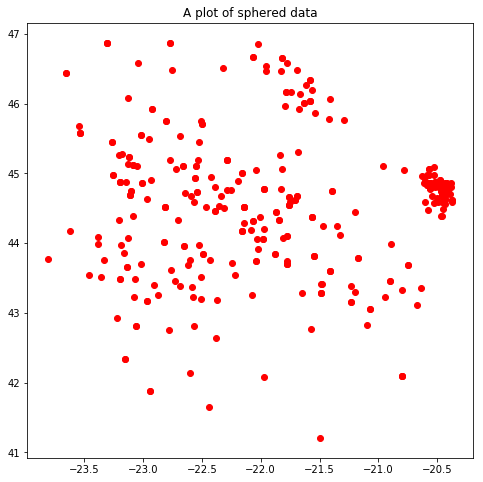

In [35]:
X_sphered = Z

N = X.shape[0]
I = permutation(N)   # Shuffled indices 0,..., N-1
I_train = I[:N//2]
I_test = I[N//2:]

Xtr_sphered = X[Itr,:]
tr_sphered = t[Itr]

Xte_sphered = X[Ite,:]
te_sphered = t[Ite]

KNN_N = 2
K_FOLDS = 5
print("Classification accuracy using the sphered data:", 100-getOverallValidationError(K_FOLDS, KNN_N, Xtr_sphered, tr_sphered)*100, "%")

scatter(Z.T[0],Z.T[1], c="r", marker="o")
title("A plot of sphered data")

In [26]:
from sklearn.cross_validation import KFold

def getOverallValidationError(nfolds, knn_n, dataset, data_targets):
    #nfolds is the number of folds
    #knn_n is the number of neighbours
    #dataset is the data to be used
    #data_targets are the targets corresponding to the dataset
    
    Xd = dataset        #Use the original training dataset (unstandardised)
    dt = data_targets   #Targets
    accuracy_data = [] #Where accuracy scores are stored
    
    cv = KFold(len(dt), n_folds = nfolds)
    
    fold = 0
    for train, validation in cv:
        #print("TRAIN:", train)
        #print("VALIDATION", validation)
        fold += 1
        
        CFA = getCrossFoldedAccuracy(knn_n, Xd[train], dt[train], Xd[validation], dt[validation])
        #print("CFA:CFA:",CFA)
        accuracy_data.append( 1- CFA)
        #print("ACC_DATA:", accuracy_data)
    return mean(accuracy_data)
            

def getCrossFoldedAccuracy(knn_n, training_data, training_data_targets, validation_data, validation_data_targets):
    #k is the number of neighbors
    #Data is the dataset
    #Data class is the dataset's class e.g. tte, ttr
    #testBool is a boolean specifying whether we are using the testing set or not (if we have to train the classifier using the training set before testing it)
    #graphBool is a boolean specifying whether the graph should be drawn
    #accuracyBool is a boolean specifying whether or not to calculate and print the accuracy. This is independent of the testBool because it allows for widened testing purposes and allows us to return the accuracy if true.
    
    knn = neighbors.KNeighborsClassifier(n_neighbors=knn_n)
    knn.fit(training_data, training_data_targets)


    # Plot the prediction by the classifier of the class probability 
    # (estimated from the fraction of points of each class in the k
    # nearest neighbours) for data on a grid.  
    
    #Accuracy  
    accuracy = 0
    predicted = knn.predict(validation_data)
    #print("PREDICTED:",predicted)
    #print("VALIDATIONTARGETS:",validation_data_targets)

    n_correct = 0
    for p in range(len(validation_data_targets)):
            if(validation_data_targets[p] == predicted[p]):
                n_correct += 1
    accuracy = n_correct/len(validation_data_targets)
    #print("Accuracy" , accuracy, "%")
    return accuracy



#Value of 2 is used (for knn_n) because it was the optimal value in the KNN section.
KNN_N = 2
print(getOverallValidationError(5, KNN_N, Xtr, ttr))
print(getOverallValidationError(10,KNN_N, Xtr, ttr))


0.168253968254
0.167973856209


## Classifying digits

Here you'll use the k-nn classifier to distinguish between digits. You can load and plot a dataset of digit images as follows (keep executing the cell to see more digits)

(1797, 64)


Text(0.5,1,'0')

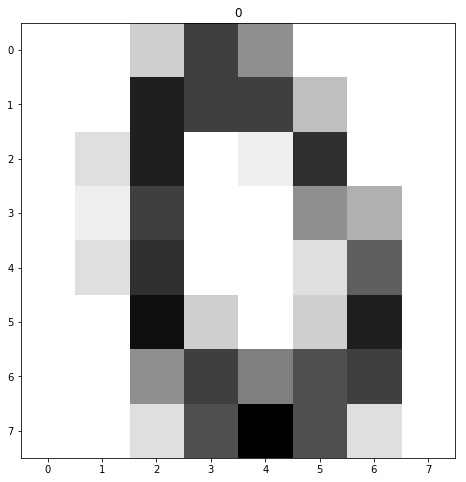

In [27]:
import sklearn.datasets
from numpy.random import randint
digits = sklearn.datasets.load_digits(n_class=10)
print(digits.data.shape)

# Pick a digit at random and plot it.  
# The title should be the number that is the digit from the target arrage
j = randint(digits.data.shape[0])
imshow(reshape(digits.data[j], (8,8)), cmap=cm.gray_r)
title("%d" % digits.target[j])

As you can see there are 1797 images arranged as 64-dimensional vectors. Choose two digits as the two classes that you'll use as the two classes and arrange them as a data and target matrix as follows.

In [28]:
mydigits = [9, 0]  # Choose your own!
I = np.logical_or(digits.target == mydigits[0], digits.target == mydigits[1])
X = digits.data[I,:]   # Features
# Make the targets 0 or 1 coresponding to the two classes
tmp = digits.target[I]
t = zeros(X.shape[0])
for i in (0,1):
    t[tmp == mydigits[i]] = i

Text(0.5,1,'1')

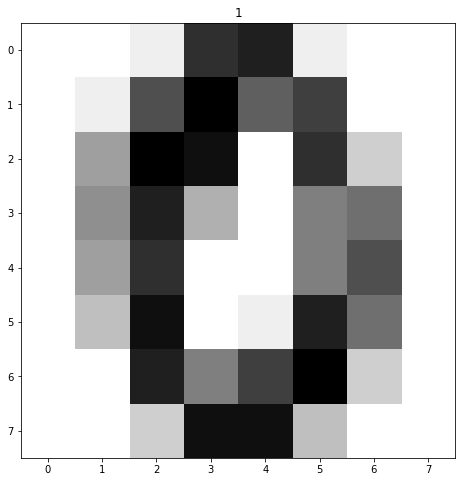

In [29]:
# Check the above: the title is now the class label, 0 or 1. 
# Re-execute to check that digits are labelled consistently
j = randint(len(t))
imshow(reshape(X[j], (8,8)), cmap=cm.gray_r)
title("%d" % t[j])

### k-nn classification

Now use your k-nn classifier to classify the image vectors.  What is the accuracy?   Note that here you should (a) split your data into training and testing data and (b) use cross validation on the training data to determine the best value of $k$ before finding the accuracy on the test data.  One reasonable way of proceeding would be to split the data into equal-sized training and test sets and then use 5 or 10 fold cross validation on the training set to determine $k$.

Do the misclassified images look like the other class?

In [36]:
#(a) Split data
from numpy.random import permutation
N = X.shape[0]
I = permutation(N)   # Shuffled indices 0,..., N-1
Itr = I[:N//2]
Ite = I[N//2:]

Xtr = X[Itr,:]
ttr = t[Itr]

Xte = X[Ite,:]
tte = t[Ite]

#(b) Cross Validate to find the best value of K
validation_errors = []
for m in range(50):
    validation_errors.append(1-getOverallValidationError(5, m+1, Xtr.copy(), ttr.copy())) #1 - error is accuracy
    
#print(validation_errors)
print("The validation error with the optimal value of K with 5 folds is: ", "k =", validation_errors.index(min(validation_errors))+1)

Optimal_k = validation_errors.index(min(validation_errors))+1

print("Accuracy:",getCrossFoldedAccuracy(Optimal_k, Xtr, ttr, Xte, tte)*100,"%")

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99444444444444446, 1.0, 1.0, 1.0, 0.99444444444444446, 0.99444444444444446, 0.99444444444444446, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99444444444444446, 1.0, 0.99444444444444446, 1.0, 1.0, 1.0, 0.99444444444444446, 1.0, 0.99444444444444446, 1.0, 1.0, 1.0, 0.99444444444444446, 0.99444444444444446, 0.99444444444444446, 0.99444444444444446, 0.99444444444444446, 0.99444444444444446, 0.98888888888888893, 0.98888888888888893, 0.98888888888888893, 0.99444444444444446]
The validation error with the optimal value of K with 5 folds is:  k = 47
Accuracy: 100.0 %


#### Do the misclassified images look like the other class?

According to the classifier: no (because there are almost no misclassified images)

Although I am very suspicious of its accuracy, I haven't been able to find any bugs that would cause it to produce incorrect information.





Lastly, this notebook does run perfectly. I've had issues re-running code snippets/cells ever since I added titles to all my graphs. So if it doesn't re-run when executed: restart the kernel and run all.